In [1]:
import os
import sys
import rasterio
import gdal
import geopandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from osgeo import gdal_array
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
%matplotlib inline
from math import floor

In [2]:
df = pd.read_csv('VAL_OCD.csv')
df.head()

,Year,SOLO_NASA,SOLO_ACFCD,SOLO_OCD,NASA_OCD,TODOS,NINGUNO,COBERTURA_NASA,COBERTURA_ACFCD,COBERTURA_OCD,ANOMALIA,AREA,P
0,2002,0,0,0,0,1,0,25,25,50,1,111,16155
1,2002,0,0,0,0,0,1,0,0,0,1,23,4600
2,2002,0,0,0,0,0,1,0,0,0,1,15,3154
3,2002,0,0,0,0,0,1,0,0,0,0,34,4924
4,2002,0,0,0,0,0,1,0,0,0,0,283,23131


In [3]:
from math import sqrt
import pandas_profiling
pandas_profiling.ProfileReport(df)

C:\Users\Miguel\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,13
Number of observations,293
Total Missing (%),0.0%
Total size in memory,29.9 KiB
Average record size in memory,104.4 B
Numeric,4
Categorical,0
Boolean,7
Date,0
Text (Unique),0
Rejected,2


In [4]:
df['TOT_ACFCD'] = df['SOLO_ACFCD'] + df['TODOS']
df['TOT_NASA'] = df['SOLO_NASA'] + df['TODOS'] + df['NASA_OCD']
df['TOT_OCD'] = df['SOLO_ACFCD'] + df['TODOS'] + df['SOLO_OCD'] + df['NASA_OCD']
df.head()

,Year,SOLO_NASA,SOLO_ACFCD,SOLO_OCD,NASA_OCD,TODOS,NINGUNO,COBERTURA_NASA,COBERTURA_ACFCD,COBERTURA_OCD,ANOMALIA,AREA,P,TOT_ACFCD,TOT_NASA,TOT_OCD
0,2002,0,0,0,0,1,0,25,25,50,1,111,16155,1,1,1
1,2002,0,0,0,0,0,1,0,0,0,1,23,4600,0,0,0
2,2002,0,0,0,0,0,1,0,0,0,1,15,3154,0,0,0
3,2002,0,0,0,0,0,1,0,0,0,0,34,4924,0,0,0
4,2002,0,0,0,0,0,1,0,0,0,0,283,23131,0,0,0


In [5]:
df['Grav'] = 0.28*(df['P'].astype(float) / np.sqrt(df['AREA'].astype(float)*10000))

In [6]:
df = df[df['AREA'] >= 10]

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.distplot(df['Grav'])

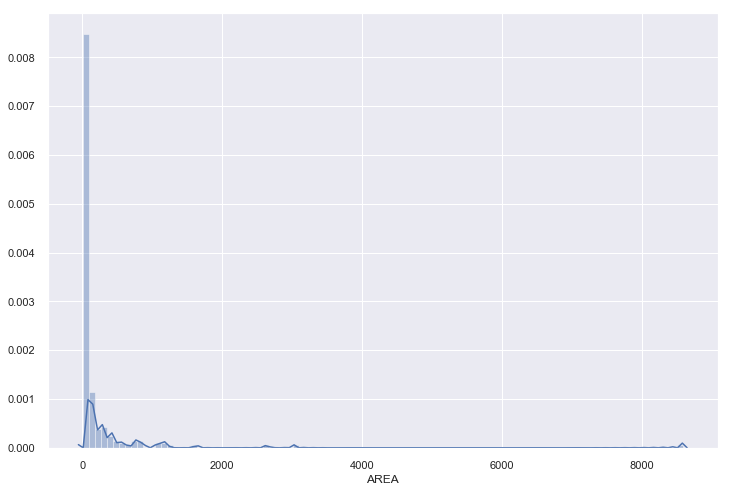

In [10]:
%matplotlib inline
plt.figure(figsize=(12,8))
sns.distplot(df['AREA'],bins=100)

In [11]:
df[df['AREA']<100].count()

Year               182
SOLO_NASA          182
SOLO_ACFCD         182
SOLO_OCD           182
NASA_OCD           182
TODOS              182
NINGUNO            182
COBERTURA_NASA     182
COBERTURA_ACFCD    182
COBERTURA_OCD      182
ANOMALIA           182
AREA               182
P                  182
TOT_ACFCD          182
TOT_NASA           182
TOT_OCD            182
Grav               182
dtype: int64

In [12]:
df['Tamaño'] = 0
df.loc[df['AREA'] > 500, 'Tamaño'] = 'GIF'
df.loc[df['AREA'] < 500, 'Tamaño'] = 'Normal'

In [13]:
df['TOT_ACFCD1'] = df[df['TOT_ACFCD'] == 1]['TOT_ACFCD']
df['TOT_NASA1'] = df[df['TOT_NASA'] == 1]['TOT_NASA']
df['TOT_OCD1'] = df[df['TOT_OCD'] == 1]['TOT_OCD']

In [14]:
%matplotlib inline

Text(0.5, 1.0, 'Numero de cambios bruscos detectados por el algoritmo ACFCD')

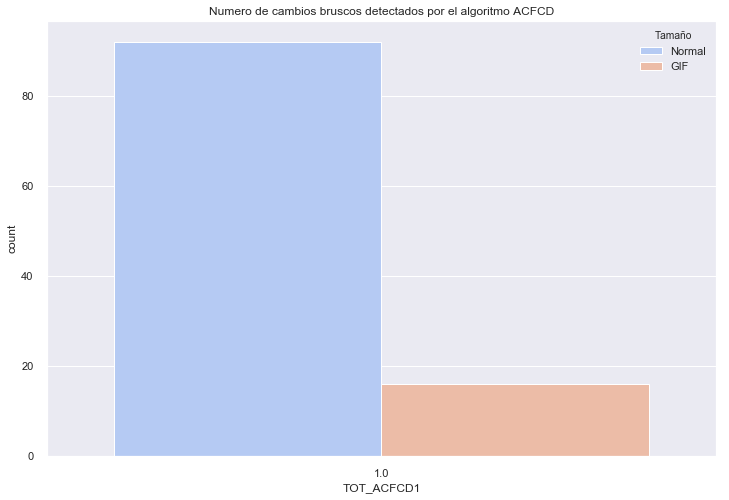

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='TOT_ACFCD1',hue='Tamaño',data=df,palette='coolwarm')
plt.title(label='Numero de cambios bruscos detectados por el algoritmo ACFCD',)

Text(0.5, 1.0, 'Numero de cambios bruscos detectados por el algoritmo OCD')

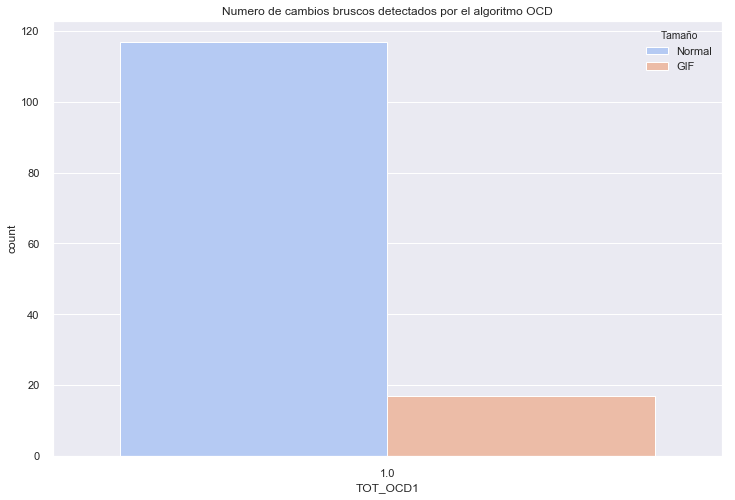

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x='TOT_OCD1',hue='Tamaño',data=df,palette='coolwarm')
plt.title(label='Numero de cambios bruscos detectados por el algoritmo OCD',)

Text(0.5, 1.0, 'Numero de cambios bruscos detectados por el algoritmo NASA')

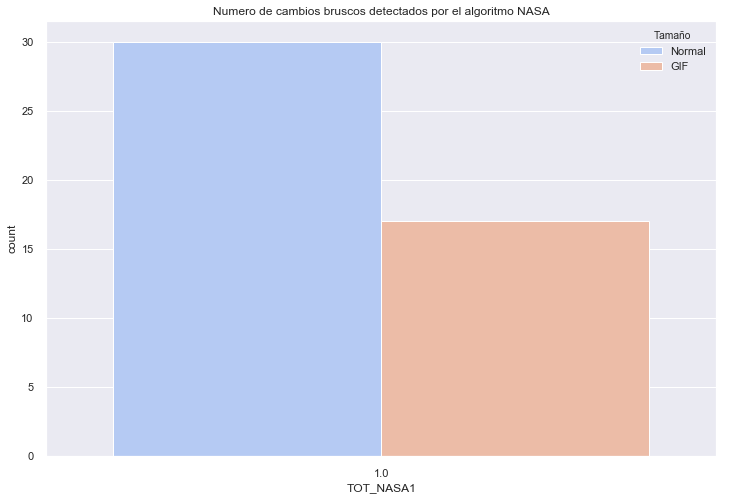

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='TOT_NASA1',hue='Tamaño',data=df,palette='coolwarm')
plt.title(label='Numero de cambios bruscos detectados por el algoritmo NASA',)

In [18]:
df[(df['TOT_ACFCD'] == 0) & (df['AREA'] >= 500)]

,Year,SOLO_NASA,SOLO_ACFCD,SOLO_OCD,NASA_OCD,TODOS,NINGUNO,COBERTURA_NASA,COBERTURA_ACFCD,COBERTURA_OCD,...,AREA,P,TOT_ACFCD,TOT_NASA,TOT_OCD,Grav,Tamaño,TOT_ACFCD1,TOT_NASA1,TOT_OCD1
211,2012,0,0,0,1,0,0,100,100,100,...,2644,117455,0,1,1,6.395858,GIF,NaN,1.0,1.0
257,2016,0,0,0,0,0,1,0,0,0,...,632,25452,0,0,0,2.834793,GIF,NaN,NaN,NaN


In [19]:
df[(df['TOT_OCD'] == 0) & (df['AREA'] >= 500)]

,Year,SOLO_NASA,SOLO_ACFCD,SOLO_OCD,NASA_OCD,TODOS,NINGUNO,COBERTURA_NASA,COBERTURA_ACFCD,COBERTURA_OCD,...,AREA,P,TOT_ACFCD,TOT_NASA,TOT_OCD,Grav,Tamaño,TOT_ACFCD1,TOT_NASA1,TOT_OCD1
257,2016,0,0,0,0,0,1,0,0,0,...,632,25452,0,0,0,2.834793,GIF,NaN,NaN,NaN


In [20]:
df[(df['TOT_NASA'] == 0) & (df['AREA'] >= 500)]

,Year,SOLO_NASA,SOLO_ACFCD,SOLO_OCD,NASA_OCD,TODOS,NINGUNO,COBERTURA_NASA,COBERTURA_ACFCD,COBERTURA_OCD,...,AREA,P,TOT_ACFCD,TOT_NASA,TOT_OCD,Grav,Tamaño,TOT_ACFCD1,TOT_NASA1,TOT_OCD1
257,2016,0,0,0,0,0,1,0,0,0,...,632,25452,0,0,0,2.834793,GIF,NaN,NaN,NaN


In [21]:
Total_registros = df['Year'].count()
Actual_NASA = df[df['TOT_NASA'] == 1].count()['TOT_NASA']
Actual_ACFCD = df[df['TOT_ACFCD'] == 1].count()['TOT_ACFCD']
Actual_OCD = df[df['TOT_OCD'] == 1].count()['TOT_OCD']

Aciertos_CDV6 = Actual_ACFCD/Total_registros *100
Aciertos_NASA = Actual_NASA/Total_registros *100
Aciertos_OCD = Actual_OCD/Total_registros *100


print("Total aciertos (n) ACFCD: {a}%, Total aciertos NASA: {b}%, Total aciertos OCD: {c}%".format\
      (a=floor(Aciertos_CDV6), b=floor(Aciertos_NASA), c=floor(Aciertos_OCD)))

Total aciertos (n) ACFCD: 43%, Total aciertos NASA: 19%, Total aciertos OCD: 54%


In [22]:
df['Sup_acACFCD'] = df['COBERTURA_ACFCD'] * df['AREA'] / 100
df['Sup_acNASA'] = df['COBERTURA_NASA'] * df['AREA'] / 100
df['Sup_acOCD'] = df['COBERTURA_OCD'] * df['AREA'] / 100

Total_Area = df['AREA'].sum()

Superficie_acertada_ACFCD = df['Sup_acACFCD'].sum()
Superficie_acertada_NASA = df['Sup_acNASA'].sum()
Superficie_acertada_OCD = df['Sup_acOCD'].sum()

Aciertos_sup_ACFCD =  100 * (Superficie_acertada_ACFCD / Total_Area)
Aciertos_sup_NASA =  100 * (Superficie_acertada_NASA / Total_Area)
Aciertos_sup_OCD = 100 * (Superficie_acertada_OCD / Total_Area)

print("Total aciertos (% Sup) ACFCD: {a}%, Total aciertos NASA: {b}%, Total aciertos OCD: {c}%".format\
      (a=floor(Aciertos_sup_ACFCD), b=floor(Aciertos_sup_NASA), c=floor(Aciertos_sup_OCD)))

Total aciertos (% Sup) ACFCD: 73%, Total aciertos NASA: 64%, Total aciertos OCD: 83%


In [23]:
def Validacion_Area(inf,sup):
    
    inf = int(inf)
    sup = int(sup)
    
    df_val = df[(df['AREA'] >= inf) & (df['AREA'] <= sup)]
    
    Total_registros = df_val['Year'].count()
    Actual_NASA = df_val[df_val['TOT_NASA'] == 1].count()['TOT_NASA']
    Actual_ACFCD = df_val[df_val['TOT_ACFCD'] == 1].count()['TOT_ACFCD']
    Actual_OCD = df_val[df_val['TOT_OCD'] == 1].count()['TOT_OCD']
    
    Aciertos_ACFCD = Actual_ACFCD/Total_registros *100
    Aciertos_NASA = Actual_NASA/Total_registros *100
    Aciertos_OCD = Actual_OCD/Total_registros *100


    print("Total aciertos (n) ACFCD: {a}%, Total aciertos NASA: {b}%, Total aciertos OCD: {c}%".format\
      (a=floor(Aciertos_ACFCD), b=floor(Aciertos_NASA), c=floor(Aciertos_OCD)))
    
    df_val['Sup_acACFCD'] = df_val['COBERTURA_ACFCD'] * df_val['AREA'] / 100
    df_val['Sup_acNASA'] = df_val['COBERTURA_NASA'] * df_val['AREA'] / 100
    df_val['Sup_acOCD'] = df_val['COBERTURA_OCD'] * df_val['AREA'] / 100

    Total_Area = df_val['AREA'].sum()

    Superficie_acertada_ACFCD = df_val['Sup_acACFCD'].sum()
    Superficie_acertada_NASA = df_val['Sup_acNASA'].sum()
    Superficie_acertada_OCD = df_val['Sup_acOCD'].sum()

    Aciertos_sup_ACFCD =  100 * (Superficie_acertada_ACFCD / Total_Area)
    Aciertos_sup_NASA =  100 * (Superficie_acertada_NASA / Total_Area)
    Aciertos_sup_OCD = 100 * (Superficie_acertada_OCD / Total_Area)

    print("Total aciertos (% Sup) ACFCD: {a}%, Total aciertos NASA: {b}%, Total aciertos OCD: {c}%".format\
          (a=floor(Aciertos_sup_ACFCD), b=floor(Aciertos_sup_NASA), c=floor(Aciertos_sup_OCD)))

In [25]:
Validacion_Area(500,10000)

Total aciertos (n) ACFCD: 88%, Total aciertos NASA: 94%, Total aciertos OCD: 94%
Total aciertos (% Sup) ACFCD: 87%, Total aciertos NASA: 87%, Total aciertos OCD: 96%


Text(0.5, 1.0, '% de numero de aciertos por año y algoritmo')

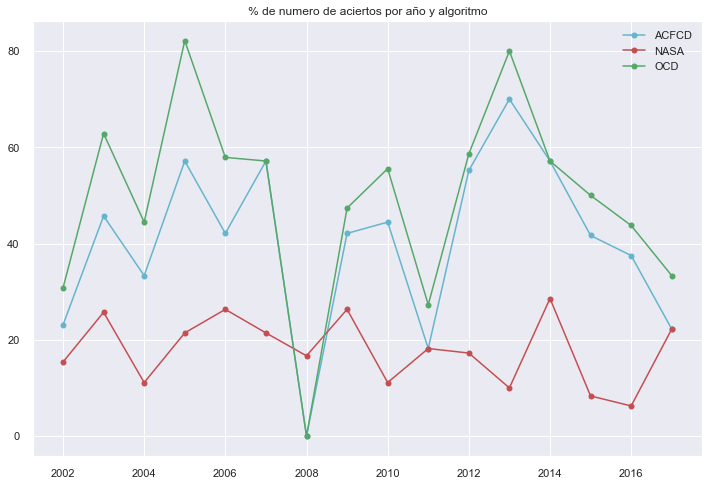

In [26]:
df['Reg'] = 1

by_year = df.groupby(['Year']).sum()
plt.figure(figsize=(12,8))
plt.plot((by_year['TOT_ACFCD'] /  by_year['Reg']) * 100, color='c', marker='o')
plt.plot((by_year['TOT_NASA'] /  by_year['Reg']) * 100, color='r', marker='o')
plt.plot((by_year['TOT_OCD'] /  by_year['Reg']) * 100, color='g', marker='o')
plt.legend(labels=['ACFCD','NASA','OCD'])
plt.title(label='% de numero de aciertos por año y algoritmo')

Text(0.5, 1.0, '% Superficie acertada por año y algoritmo')

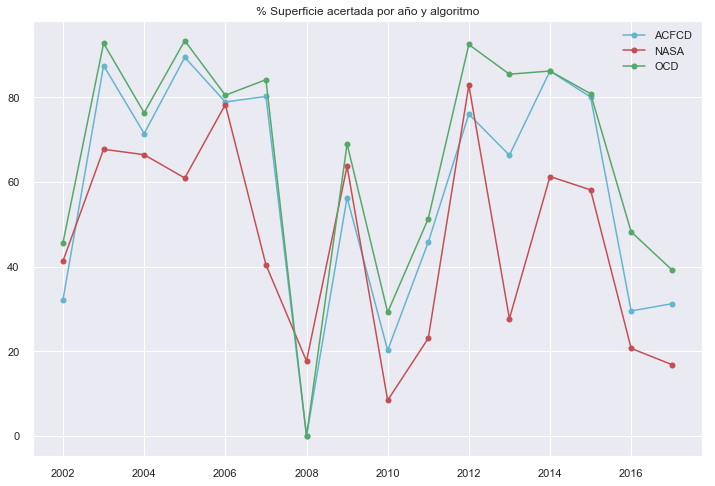

In [27]:
plt.figure(figsize=(12,8))
plt.plot((by_year['Sup_acACFCD'] /  by_year['AREA']) * 100, color='c', marker='o')
plt.plot((by_year['Sup_acNASA'] /  by_year['AREA']) * 100, color='r', marker='o')
plt.plot((by_year['Sup_acOCD'] /  by_year['AREA']) * 100, color='g', marker='o')
plt.legend(labels=['ACFCD','NASA','OCD'])
plt.title(label='% Superficie acertada por año y algoritmo')

In [ ]:
df.columns

In [ ]:
by_anomaly = df.groupby(['ANOMALIA'])['TOT_OCD'].sum()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df[df['ANOMALIA'] == 1]['TOT_OCD'], palette='coolwarm')
plt.title(label='Confirmación de cambio debido a incendio por anomalia termica')